# Abstract

This draft will be the final draft before full library implemnetation. It is here to showcase the effectiveness of the 3 Frame methods for determining RSOs and Stars in a set of given frames.

Further Work to be done before full library iteration:
- Decrease calculation time
    - Limit unneccsary Calculations (esp for loops) 
- Improve Readability


# Import Images

In [1]:
csv_num_lim=3;
import numpy as np
import copy as c

img_data=[]
label_data=[]
for i in range(0,csv_num_lim):
    img_filename=\
    ('D:/School/Grad School Summer 2021/Assignment3Git/SampleData/sample_data_undergrads/images/'+str(i)+'.csv')
    img_data.append(np.genfromtxt(img_filename,delimiter=',',dtype=None))
    label_filename=\
    ('D:/School/Grad School Summer 2021/Assignment3Git/SampleData/sample_data_undergrads/labels/'+str(i)+'.csv')
    label_data.append(np.genfromtxt(label_filename,delimiter=',',dtype=None))
img_data=np.array(img_data);
label_data=np.array(label_data);

# First Frame

## Detection of significant pixels

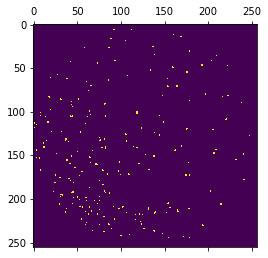

In [2]:
#create copies of the frames
first_frame=c.copy(img_data[0][:][:])
second_frame=c.copy(img_data[1][:][:])
third_frame=c.copy(img_data[2][:][:])

#A good threshold value is the mean of the first_frame +100 
mean_first_frame=np.mean(first_frame)+100
import numpy as np
bin_first_frame=np.zeros(np.shape(first_frame))
for i in range(0,np.shape(first_frame)[0]):
    for j in range(0,np.shape(first_frame)[1]):
        if first_frame[i,j]>mean_first_frame:
            bin_first_frame[i,j]=1
            
import matplotlib.pyplot as plt
plt.matshow(bin_first_frame)

## Determining Clusters

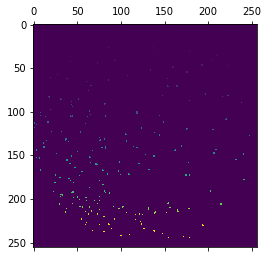

In [3]:
bin_first_frame_coords_1= np.where(bin_first_frame==1)
bin_first_frame_coords_2=[]
#Repackage Data
for i in range(0,np.shape(bin_first_frame_coords_1)[1]):
    bin_first_frame_coords_2.append([bin_first_frame_coords_1[0][i],bin_first_frame_coords_1[1][i]])
    
#We can then perform a Clustering Algorithm 
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=2,min_samples=1)
y_pred=db.fit_predict(bin_first_frame_coords_2)

 #Repackage Data into a 2D form
TwoD_clusterData=np.zeros(np.shape(bin_first_frame))
xdata=np.array(bin_first_frame_coords_2)[:,0]
ydata=np.array(bin_first_frame_coords_2)[:,1]
zdata=y_pred[:]

cluster_data=[xdata,ydata,zdata]
for i in range(0,np.shape(cluster_data)[1]):
    TwoD_clusterData[xdata[i]][ydata[i]]=zdata[i]
plt.matshow(TwoD_clusterData)

We see the colour change with the cluster identification

## Finding Centroids

In [4]:
centroid_x=[]
#Linear Frame
centroid_y=[]
for i in range(0,np.max(zdata)):
    xcoords=xdata[np.where(zdata==i)]
    ycoords=ydata[np.where(zdata==i)]
    count=np.count_nonzero((zdata==i))
    centroid_x.append(np.sum(xcoords)/count)
    centroid_y.append(np.sum(ycoords)/count)  

centroid_x2=[]
#x,y,z form
centroid_y2=[]    

for i in range(0,np.shape(zdata)[0]):
    xcoords=xdata[np.where(zdata[i]==zdata)]
    ycoords=ydata[np.where(zdata[i]==zdata)]
    count=np.count_nonzero((zdata[i]==zdata))
    centroid_x2.append(np.sum(xcoords)/count)
    centroid_y2.append(np.sum(ycoords)/count)

## Scale - Number of Pixels/Cluster

In [5]:
# cluster_data contains xcoords, ycoords, and group number.
cluster_data_count=[]
#list of labels form
cluster_data_count2=[]
#x,y,z,
for i in range(np.min(zdata),np.max(zdata)):
    cluster_data_count.append(np.count_nonzero(i==zdata))
for k in range(0,np.shape(zdata)[0]):
    cluster_data_count2.append(np.count_nonzero(zdata[k]==zdata))

## Brightness- Average Brightness per Cluster

In [6]:
#This essentially finds the average of the pixels detected for a particular cluster
cluster_data_av_mag=[]
#2D form
cluster_data_av_mag_2=[]
#x,y,label form
for i in range(np.min(zdata),np.max(zdata)+1):
    cluster_data_av_mag.append(np.mean(first_frame[np.where(TwoD_clusterData==i)]))
for j in range(0,np.shape(cluster_data)[1]):
    cluster_data_av_mag_2.append(cluster_data_av_mag[(zdata[j])])
#Cluster Projection with Averaged Magntitude

# Second Frame

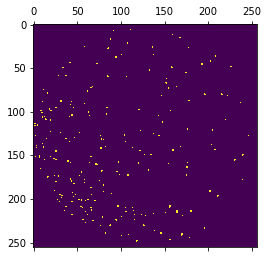

In [7]:
second_frame=img_data[1][:][:]
mean_second_frame=np.mean(second_frame)+100
import numpy as np
bin_second_frame=np.zeros(np.shape(second_frame))
for i in range(0,np.shape(second_frame)[0]):
    for j in range(0,np.shape(second_frame)[1]):
        if second_frame[i,j]>mean_second_frame:
            bin_second_frame[i,j]=1
plt.matshow(bin_second_frame)

## Clustering Second Frame

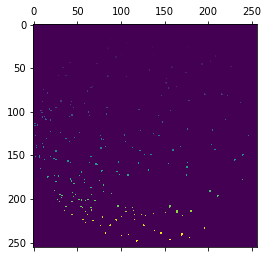

In [8]:
bin_second_frame_coords_1= np.where(bin_second_frame==1)
bin_second_frame_coords_2=[]
#Repackage Data
for i in range(0,np.shape(bin_second_frame_coords_1)[1]):
    bin_second_frame_coords_2.append([bin_second_frame_coords_1[0][i],bin_second_frame_coords_1[1][i]])
#We can then perform a Clustering Algorithm 
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=2,min_samples=1)
y_pred=db.fit_predict(bin_second_frame_coords_2)

xdata2=np.array(bin_second_frame_coords_2)[:,0]
ydata2=np.array(bin_second_frame_coords_2)[:,1]
zdata2=y_pred[:]

 #Repackage Data into a 2D form
TwoD_clusterData2=np.zeros(np.shape(bin_second_frame))    
cluster_data2=[xdata2,ydata2,zdata2]
for i in range(0,np.shape(cluster_data2)[1]):
    TwoD_clusterData2[xdata2[i]][ydata2[i]]=zdata2[i]
plt.matshow(TwoD_clusterData2)

## Second Frame- Centroiding

In [9]:
centroid_x2_second_frame=[]
#x,y,z form
centroid_y2_second_frame=[]    

for i in range(0,np.shape(zdata2)[0]):
    xcoords2=xdata2[np.where(zdata2[i]==zdata2)]
    ycoords2=ydata2[np.where(zdata2[i]==zdata2)]
    count2=np.count_nonzero((zdata2[i]==zdata2))
    centroid_x2_second_frame.append(np.sum(xcoords2)/count2)
    centroid_y2_second_frame.append(np.sum(ycoords2)/count2)

## Second Frame- Cluster Count & Average Brightness

In [10]:
#Cluster Count
cluster_data_count_second_frame=[]
cluster_data_count_second_frame2=[]
for i in range(0,np.max(zdata2)):
    cluster_data_count_second_frame.append(np.count_nonzero(i==zdata2))
for k in range(0,np.shape(zdata2)[0]):
    cluster_data_count_second_frame2.append(np.count_nonzero(zdata2[k]==zdata2))
#This essentially finds the average of the pixels detected for a particular cluster
cluster_data_av_mag_second_frame=[]
#2D form
cluster_data_av_mag_2_second_frame=[]
#x,y,label form
for i in range(np.min(zdata2),np.max(zdata2)+1):
    cluster_data_av_mag_second_frame.append(np.mean(second_frame[np.where(TwoD_clusterData2==i)]))
for j in range(0,np.shape(zdata2)[0]):
    #xdata[np.where(zdata2[j]==zdata2)]    
    cluster_data_av_mag_2_second_frame.append(cluster_data_av_mag_second_frame[(zdata2[j])])

# Third Frame

## Third Frame - Clustering, Cluster Count, Average Brightness

In [11]:
third_frame=img_data[2][:][:]
mean_third_frame=np.mean(third_frame)+100
import numpy as np
bin_third_frame=np.zeros(np.shape(third_frame))
for i in range(0,np.shape(third_frame)[0]):
    for j in range(0,np.shape(third_frame)[1]):
        if third_frame[i,j]>mean_third_frame:
            bin_third_frame[i,j]=1
bin_third_frame_coords_1= np.where(bin_third_frame==1)
bin_third_frame_coords_2=[]
#Repackage Data
for i in range(0,np.shape(bin_third_frame_coords_1)[1]):
    bin_third_frame_coords_2.append([bin_third_frame_coords_1[0][i],bin_third_frame_coords_1[1][i]])
#We can then perform a Clustering Algorithm 
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=2,min_samples=1)
y_pred=db.fit_predict(bin_third_frame_coords_2)
xdata3=np.array(bin_third_frame_coords_2)[:,0]
ydata3=np.array(bin_third_frame_coords_2)[:,1]
zdata3=y_pred[:]
TwoD_clusterData3=np.zeros(np.shape(bin_third_frame))    
cluster_data3=[xdata3,ydata3,zdata3]
for i in range(0,np.shape(cluster_data3)[1]):
    TwoD_clusterData3[xdata3[i]][ydata3[i]]=zdata3[i]
# cluster_data contains xcoords, ycoords, and group number. We can also add number of lit pixels to this
cluster_data_count_third_frame=[]
cluster_data_count_third_frame2=[]
for i in range(0,np.max(zdata3)):
    cluster_data_count_third_frame.append(np.count_nonzero(i==zdata3))
for k in range(0,np.shape(zdata3)[0]):
    cluster_data_count_third_frame2.append(np.count_nonzero(zdata3[k]==zdata3))
#This essentially finds the average of the pixels detected for a particular cluster
cluster_data_av_mag_third_frame=[]
#2D form
cluster_data_av_mag_2_third_frame=[]
#x,y,label form
for i in range(np.min(zdata3),np.max(zdata3)+1):
    cluster_data_av_mag_third_frame.append(np.mean(third_frame[np.where(TwoD_clusterData3==i)]))
for j in range(0,np.shape(zdata3)[0]):
    cluster_data_av_mag_2_third_frame.append(cluster_data_av_mag_third_frame[(zdata3[j])])

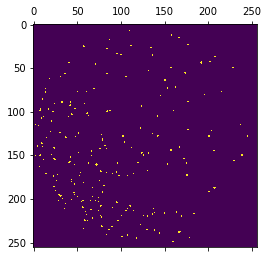

In [12]:
plt.matshow(bin_third_frame)

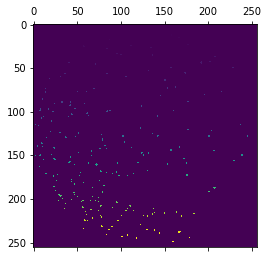

In [13]:
for i in range(0,np.shape(cluster_data3)[1]):
    TwoD_clusterData3[xdata3[i]][ydata3[i]]=zdata3[i]
plt.matshow(TwoD_clusterData3)

In [14]:


centroid_x2_third_frame=[]
#x,y,z form
centroid_y2_third_frame=[]    

for i in range(0,np.shape(zdata3)[0]):
    xcoords3=xdata3[np.where(zdata3[i]==zdata3)]
    ycoords3=ydata3[np.where(zdata3[i]==zdata3)]
    count3=np.count_nonzero((zdata3[i]==zdata3))
    centroid_x2_third_frame.append(np.sum(xcoords3)/count3)
    centroid_y2_third_frame.append(np.sum(ycoords3)/count3)

# Vector Connection Generation

D:\Programs\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
<ipython-input-16-7739ee990f99>:137: RuntimeWarning: divide by zero encountered in longlong_scalars
  ((array_draw_coords[i,3]-array_draw_coords[i,1])/(array_draw_coords[i,2]-array_draw_coords[i,0]))
<ipython-input-16-7739ee990f99>:139: RuntimeWarning: divide by zero encountered in longlong_scalars
  ((array_draw_coords2[j,3]-array_draw_coords2[j,1])/(array_draw_coords2[j,2]-array_draw_coords2[j,0]))
<ipython-input-16-7739ee990f99>:139: RuntimeWarning: invalid value encountered in longlong_scalars
  ((array_draw_coords2[j,3]-array_draw_coords2[j,1])/(array_draw_coords2[j,2]-array_draw_coords2[j,0]))
<ipython-

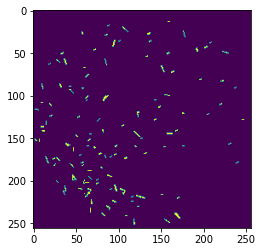

In [16]:
import cv2 as cv
Detected_Vectors=[]
Detected_Vectors_Components1=[]
Detected_Vectors_Components2=[]
distance_calibration_matrix=[0.3,0.3,0.3,0.3,0.3,0.3,0.3]

#higher difference= more lines detected
vector_diff_calibration_matrix=[4,4,4,4,4,8,9]

Draft2_pic5=np.zeros(np.shape(first_frame))
for m in range(1,np.max(cluster_data_count2)):
    
    if ((m!=1) | (m!=np.max(cluster_data_count2))):
        cluster_indx1=(np.transpose(cluster_data_count2[:])==m)\
        | (np.transpose(cluster_data_count2[:])==(m-1) | (np.transpose(cluster_data_count2[:])==(m+1)))
        cluster_indx2=(np.transpose(cluster_data_count_second_frame2[:])==m)\
        | (np.transpose(cluster_data_count_second_frame2[:])==(m-1)\
           | (np.transpose(cluster_data_count_second_frame2[:])==(m+1)))
        cluster_indx3=(np.transpose(cluster_data_count_third_frame2[:])==m)\
        | (np.transpose(cluster_data_count_third_frame2[:])==(m-1)\
           | (np.transpose(cluster_data_count_third_frame2[:])==(m+1)))
        Group_of_1s=[xdata[cluster_indx1],ydata[cluster_indx1]\
                     ,np.array(cluster_data_av_mag_2)[cluster_indx1]]    
        Group_of_1s_second_frame=[xdata2[cluster_indx2],ydata2[cluster_indx2]\
                                  ,np.array(cluster_data_av_mag_2_second_frame)[cluster_indx2]] 
        Group_of_1s_third_frame=[xdata3[cluster_indx3],ydata3[cluster_indx3]\
                                 ,np.array(cluster_data_av_mag_2_third_frame)[cluster_indx3]]
    elif ((m==1)):
        cluster_indx1=((np.transpose(cluster_data_count2[:])==m)\
                       | (np.transpose(cluster_data_count2[:])==(m+1)))
        cluster_indx2=((np.transpose(cluster_data_count_second_frame2[:])==m)\
                       | (np.transpose(cluster_data_count_second_frame2[:])==(m+1)))
        cluster_indx3=((np.transpose(cluster_data_count_third_frame2[:])==m)\
                       |  (np.transpose(cluster_data_count_third_frame2[:])==(m+1)))
        Group_of_1s=[xdata[cluster_indx1],ydata[cluster_indx1],np.array(cluster_data_av_mag_2)[cluster_indx1]]    
        Group_of_1s_second_frame=[xdata2[cluster_indx2],ydata2[cluster_indx2]\
                                  ,np.array(cluster_data_av_mag_2_second_frame)[cluster_indx2]] 
        Group_of_1s_third_frame=[xdata3[cluster_indx3],ydata3[cluster_indx3]\
                                 ,np.array(cluster_data_av_mag_2_third_frame)[cluster_indx3]]
    elif(m==np.max(cluster_data_count2)):
        cluster_indx1=((np.transpose(cluster_data_count2[:])==m)\
                       | (np.transpose(cluster_data_count2[:])==(m-1) ))
        cluster_indx2=((np.transpose(cluster_data_count_second_frame2[:])==m)\
                       | (np.transpose(cluster_data_count_second_frame2[:])==(m-1)))
        cluster_indx3=((np.transpose(cluster_data_count_third_frame2[:])==m)\
                       | (np.transpose(cluster_data_count_third_frame2[:])==(m-1) ))  
        Group_of_1s=[xdata[cluster_indx1],ydata[cluster_indx1],\
                     np.array(cluster_data_av_mag_2)[cluster_indx1]]    
        Group_of_1s_second_frame=[xdata2[cluster_indx2],ydata2[cluster_indx2],\
                                  np.array(cluster_data_av_mag_2_second_frame)[cluster_indx2]] 
        Group_of_1s_third_frame=[xdata3[cluster_indx3],\
                                 ydata3[cluster_indx3],np.array(cluster_data_av_mag_2_third_frame)[cluster_indx3]]



    _1sframe=np.zeros(np.shape(first_frame))    
    reduced_xdata=Group_of_1s[0][:]
    reduced_ydata=Group_of_1s[1][:]
    reduced_bightness=Group_of_1s[2][:]
    for i in range(0,np.shape(reduced_xdata)[0]):
                _1sframe[reduced_xdata[i]][reduced_ydata[i]]=reduced_bightness[i]
    _1sframe2=np.zeros(np.shape(second_frame)) 
    reduced_xdata2=Group_of_1s_second_frame[0][:]
    reduced_ydata2=Group_of_1s_second_frame[1][:]
    reduced_bightness2=Group_of_1s_second_frame[2][:]
    for i in range(0,np.shape(reduced_xdata2)[0]):
                _1sframe2[reduced_xdata2[i]][reduced_ydata2[i]]=reduced_bightness2[i]
    _1sframe3=np.zeros(np.shape(third_frame)) 
    reduced_xdata3=Group_of_1s_third_frame[0][:]
    reduced_ydata3=Group_of_1s_third_frame[1][:]
    reduced_bightness3=Group_of_1s_third_frame[2][:]
    for i in range(0,np.shape(reduced_xdata3)[0]):
                _1sframe3[reduced_xdata3[i]][reduced_ydata3[i]]=reduced_bightness3[i]
    #possible frame 3 coordinates
    possible_frame3_coords=[]
    #frame1_x,frame1_y,[frame2_x,frame2_y]
    reduced_possible_frame3_coords=[]

    possible_frame2_coords=[]
    #frame1_x,frame1_y,[frame2_x,frame2_y]
    reduced_possible_frame2_coords=[]

    for i in range(0,np.shape(_1sframe)[0]):
        for j in range (0,np.shape(_1sframe)[1]):

            #If dot detected, perform search for second dot
            if _1sframe[i,j] != 0:
                #Perfrom "Search" based on average brightness
                possible_frame2_coords.append\
                ([i,j,np.where((_1sframe2>(_1sframe[i,j]-\
                                           (_1sframe[i,j]*distance_calibration_matrix[m])))\
                               & (_1sframe2<(_1sframe[i,j]+(_1sframe[i,j]*distance_calibration_matrix[m]))))])
    
    for i in range(0,np.shape(_1sframe2)[0]):
        for j in range(0,np.shape(_1sframe2)[1]):
            if _1sframe2[i,j] != 0:
                possible_frame3_coords.append\
                ([i,j,np.where((_1sframe3>(_1sframe2[i,j]-(_1sframe2[i,j]*distance_calibration_matrix[m])))\
                               & (_1sframe3<(_1sframe2[i,j]+(_1sframe2[i,j]*distance_calibration_matrix[m]))))])
     
    
    #draw coords has frame1_x,frame1_y,frame2_x,frame2_y
    
    draw_coords=[]
    draw_coords2=[]
    #Filter with distance 
    for i in range(0,np.shape(possible_frame2_coords)[0]):
        for j in range(0,np.shape(possible_frame2_coords[i][2])[1]):
            x_diff=possible_frame2_coords[i][0]-(possible_frame2_coords[i][2])[0][j]
            y_diff=possible_frame2_coords[i][1]-(possible_frame2_coords[i][2])[1][j]
            if ((np.linalg.norm(x_diff)<vector_diff_calibration_matrix[m])\
                & (np.linalg.norm(y_diff)<vector_diff_calibration_matrix[m])):
                draw_coords.append([possible_frame2_coords[i][0],possible_frame2_coords[i][1]\
                                    ,(possible_frame2_coords[i][2])[0][j],(possible_frame2_coords[i][2])[1][j]])

    #draw_coords2 has frame2_x,frame2_y,frame3_x,frame3_y
    for k in range(0,np.shape(possible_frame3_coords)[0]):
        for l in range(0,np.shape(possible_frame3_coords[k][2])[1]):
            x_diff2=possible_frame3_coords[k][0]-(possible_frame3_coords[k][2])[0][l]
            y_diff2=possible_frame3_coords[k][1]-(possible_frame3_coords[k][2])[1][l]
            if ((np.linalg.norm(x_diff2)<vector_diff_calibration_matrix[m])\
                & (np.linalg.norm(y_diff2)<vector_diff_calibration_matrix[m])):
                draw_coords2.append([possible_frame3_coords[k][0],possible_frame3_coords[k][1]\
                                     ,(possible_frame3_coords[k][2])[0][l],(possible_frame3_coords[k][2])[1][l]])
    
    #Connections Filtering
    #Creates new lines from previous lines Frame 1 to 2, frame 2 to 3
    #draw_coords_3 has frame1_x,frame1_y,frame3_x,frame3_y
    draw_coords3=[]
    array_draw_coords=np.array(draw_coords)
    array_draw_coords2=np.array(draw_coords2)
    if (np.shape(draw_coords)[0]>0) & (np.shape(draw_coords2)[0]>0):
        for i in range(0,np.shape(array_draw_coords)[0]):
            for j in range(0,np.shape(array_draw_coords2)[0]):
                #adding slope constraint
                slope1=np.linalg.norm\
                ((array_draw_coords[i,3]-array_draw_coords[i,1])/(array_draw_coords[i,2]-array_draw_coords[i,0]))
                slope2=np.linalg.norm\
                ((array_draw_coords2[j,3]-array_draw_coords2[j,1])/(array_draw_coords2[j,2]-array_draw_coords2[j,0]))
                if (slope1==slope2):
                #if ((slope1>(slope2-slope2*slope_percent_bound)) | (slope1<(slope2+slope2*slope_percent_bound)) ):
                    if (((array_draw_coords)[i,2]==array_draw_coords2[j,0])\
                        & (array_draw_coords[i,3]==array_draw_coords2[j,1])) :
                        draw_coords3.append([array_draw_coords[i,0]\
                                             ,array_draw_coords[i,1],array_draw_coords2[j,2],array_draw_coords2[j,3]])
                        
                        Detected_Vectors_Components1.append(array_draw_coords[i])
                        Detected_Vectors_Components2.append(array_draw_coords2[j])
                        
                    if ((array_draw_coords[i,2]==((array_draw_coords2[j,0])+1))\
                        & (array_draw_coords[i,3]==array_draw_coords2[j,1])) :
                        draw_coords3.append([array_draw_coords[i,0]\
                                             ,array_draw_coords[i,1],array_draw_coords2[j,2],array_draw_coords2[j,3]])
                        Detected_Vectors_Components1.append(array_draw_coords[i])
                        Detected_Vectors_Components2.append(array_draw_coords2[j])
                        
                        
                    if ((array_draw_coords[i,2]==((array_draw_coords2[j,0])-1))\
                        & (array_draw_coords[i,3]==array_draw_coords2[j,1])) :
                        draw_coords3.append([array_draw_coords[i,0]\
                                             ,array_draw_coords[i,1],array_draw_coords2[j,2],array_draw_coords2[j,3]])
                        
                        Detected_Vectors_Components1.append(array_draw_coords[i])
                        Detected_Vectors_Components2.append(array_draw_coords2[j])
                        
                    if ((array_draw_coords[i,2]==(array_draw_coords2[j,0]))\
                        & (array_draw_coords[i,3]==(array_draw_coords2[j,1]+1))) :
                        draw_coords3.append([array_draw_coords[i,0]\
                                             ,array_draw_coords[i,1],array_draw_coords2[j,2],array_draw_coords2[j,3]])
                        
                        Detected_Vectors_Components1.append(array_draw_coords[i])
                        Detected_Vectors_Components2.append(array_draw_coords2[j])
                        
                    if ((array_draw_coords[i,2]==(array_draw_coords2[j,0]))\
                        & (array_draw_coords[i,3]==(array_draw_coords2[j,1]-1))) :
                        draw_coords3.append([array_draw_coords[i,0]\
                                             ,array_draw_coords[i,1],array_draw_coords2[j,2],array_draw_coords2[j,3]])
                        
                        Detected_Vectors_Components1.append(array_draw_coords[i])
                        Detected_Vectors_Components2.append(array_draw_coords2[j])
    
    Detected_Vectors.append(draw_coords3)   

    #Draw lines
    for i in range(0,np.shape(draw_coords3)[0]):
        cv.line(Draft2_pic5,(draw_coords3[i][3],draw_coords3[i][2])\
                ,(draw_coords3[i][1],draw_coords3[i][0]),(255,255,255),1)

    
Detected_Vectors_Components1=np.array(Detected_Vectors_Components1)    
Detected_Vectors_Components2=np.array(Detected_Vectors_Components2)

fig=plt.figure(figsize=plt.figaspect(0.5))
plt.imshow(Draft2_pic5)


# Classification

In [18]:
#Repacking Detected Vectors
Detected_Vectors2=[]
for i in range(0,np.shape(Detected_Vectors)[0]):
    for k in range(0,np.shape(Detected_Vectors[i])[0]):
        Detected_Vectors2.append(Detected_Vectors[i][k])

Detected_Vectors2=np.array(Detected_Vectors2)   

## Classification of Stars

<ipython-input-19-1844e5b13709>:1: RuntimeWarning: divide by zero encountered in true_divide
  Detected_Slopes=(Detected_Vectors2[:,2]-Detected_Vectors2[:,0])\
<ipython-input-19-1844e5b13709>:1: RuntimeWarning: invalid value encountered in true_divide
  Detected_Slopes=(Detected_Vectors2[:,2]-Detected_Vectors2[:,0])\


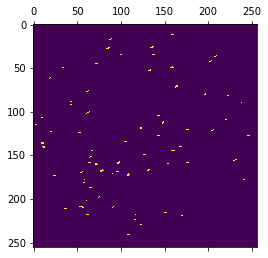

In [19]:
Detected_Slopes=(Detected_Vectors2[:,2]-Detected_Vectors2[:,0])\
/(Detected_Vectors2[:,3]-Detected_Vectors2[:,1])
Detected_Lengths=[]
for i in range(0,np.shape(Detected_Slopes)[0]):
    Detected_Lengths.append(np.linalg.norm\
                            ([(Detected_Vectors2[i,2]-Detected_Vectors2[i,0])\
                              ,(Detected_Vectors2[i,3]-Detected_Vectors2[i,1])]))

Star_slopes_image=np.zeros(np.shape(first_frame))
Star_slopes=Detected_Vectors2[((Detected_Slopes>-0.7)\
                               & (Detected_Slopes<0.1) & (np.transpose(Detected_Lengths)<4)) ]
for i in range(0,np.shape(Star_slopes)[0]):
        cv.line(Star_slopes_image,(Star_slopes[i][1]\
                                   ,Star_slopes[i][0]),(Star_slopes[i][3],Star_slopes[i][2]),(1,1,1),1)
plt.matshow(Star_slopes_image)

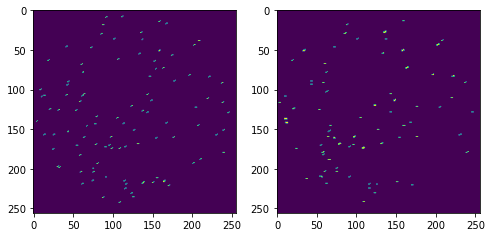

In [20]:
#star Comparison 
Star_label_data=np.zeros(np.shape(first_frame))
for i in range(0,np.shape(Star_label_data)[0]):
    for j in range(0,np.shape(Star_label_data)[1]):
        for k in range(0,3,1):
            if ((label_data[k][i][j]==2)):
                Star_label_data[i][j]=1
        
    
fig=plt.figure(figsize=plt.figaspect(0.5))
fig.add_subplot(1,2,1)
plt.imshow(Star_label_data)

fig.add_subplot(1,2,2)
plt.imshow(Star_slopes_image)

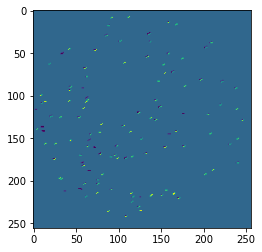

In [21]:
plt.imshow(2*Star_label_data-Star_slopes_image)

### 

In [22]:
#We may also have an issue with overlap---
#that is if there is a point on our star_slope_image "map" that is lit but does not correlate to a RSO 

truth_data1=np.zeros(np.shape(cluster_data)[1])
#frames 1
#in cluster form

truth_data2=np.zeros(np.shape(cluster_data2)[1])
#frame 2 in cluster form

truth_data3=np.zeros(np.shape(cluster_data2)[1])

for i in range(0,np.shape(Star_slopes_image)[0]):
    for j in range(0,np.shape(Star_slopes_image)[1]):
        if Star_slopes_image[i][j]==1:
            truth_data1[np.where((cluster_data[0]==i)&(cluster_data[1]==j))]=2
            truth_data2[np.where((cluster_data2[0]==i)&(cluster_data2[1]==j))]=2
            truth_data3[np.where((cluster_data3[0]==i)&(cluster_data3[1]==j))]=2


# Classifying RSOs

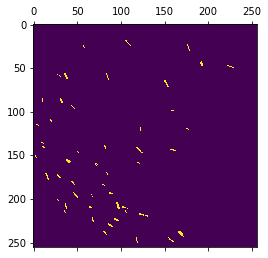

In [23]:
RSO_slopes_image=np.zeros(np.shape(first_frame))
RSOs=Detected_Vectors2[((np.isinf(Detected_Slopes)==0)&(np.sign(Detected_Slopes)==1))]
for i in range(0,np.shape(RSOs)[0]):
        cv.line(RSO_slopes_image,(RSOs[i][1],RSOs[i][0]),(RSOs[i][3],RSOs[i][2]),(1,1,1),1)

for i in range(0,np.shape(RSO_slopes_image)[0]):
    for j in range(0,np.shape(RSO_slopes_image)[1]):
        if RSO_slopes_image[i][j]==1:
            truth_data1[np.where((cluster_data[0]==i)&(cluster_data[1]==j))]=1
            truth_data2[np.where((cluster_data2[0]==i)&(cluster_data2[1]==j))]=1
            truth_data3[np.where((cluster_data3[0]==i)&(cluster_data3[1]==j))]=1
plt.matshow(RSO_slopes_image)

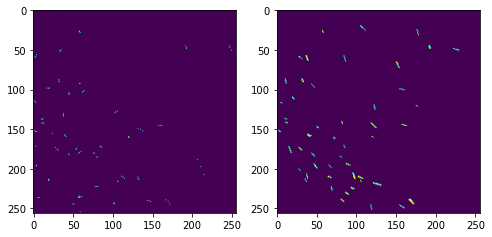

In [24]:
#RSO Comparison
RSO_label_data=np.zeros(np.shape(first_frame))
for i in range(0,np.shape(RSO_label_data)[0]):
    for j in range(0,np.shape(RSO_label_data)[1]):
        for k in range(0,3,1):
            if ((label_data[k][i][j]==1)):
                RSO_label_data[i][j]=1
        
fig=plt.figure(figsize=plt.figaspect(0.5))
fig.add_subplot(1,2,1)
plt.imshow(RSO_label_data)

fig.add_subplot(1,2,2)
plt.imshow(RSO_slopes_image)

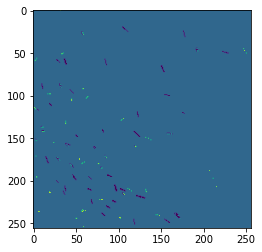

In [25]:
plt.imshow(2*RSO_label_data-RSO_slopes_image)

# Table Generation

In [26]:
from tabulate import tabulate

In [27]:
from statistics import mode
#Repackagae Data to Table
Repacked_list1=[]
Repacked_list1.append(['X Coord','Y Coord',\
                       'Bright','Cent X','Cent Y',\
                       '# of Pix','Mo Vect X','Mo Vect Y',\
                       'Noise Lvl','Class' ])
for i in range(0, np.shape(xdata)[0]):
    if(np.count_nonzero(Detected_Vectors_Components1[:,0]==xdata[i]))>0:
        x_vector=mode(Detected_Vectors_Components1[:,2][(Detected_Vectors_Components1[:,0]==xdata[i])])\
        -mode(Detected_Vectors_Components1[:,0][(Detected_Vectors_Components1[:,0]==xdata[i])])
    else:
        x_vector=0
    
    if(((np.count_nonzero(Detected_Vectors_Components1[:,1]==ydata[i]))>0)&\
       ((np.count_nonzero(Detected_Vectors_Components1[:,3]==ydata[i]))>0)):
        y_vector=mode(Detected_Vectors_Components1[:,3][(Detected_Vectors_Components1[:,1]==ydata[i])])\
        -mode(Detected_Vectors_Components1[:,1][(Detected_Vectors_Components1[:,1]==ydata[i])])
    else:
        y_vector=0
    
    Repacked_list1.append\
    ([xdata[i],ydata[i],first_frame[xdata[i],ydata[i]],centroid_x2[i],\
      centroid_y2[i],cluster_data_count2[i],x_vector,y_vector,np.mean(first_frame),truth_data1[i]])

In [28]:
print(tabulate(Repacked_list1,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════╤═══════════╤══════════╤══════════╤══════════╤════════════╤═════════════╤═════════════╤═════════════╤═════════╕
│   X Coord │   Y Coord │   Bright │   Cent X │   Cent Y │   # of Pix │   Mo Vect X │   Mo Vect Y │   Noise Lvl │   Class │
╞═══════════╪═══════════╪══════════╪══════════╪══════════╪════════════╪═════════════╪═════════════╪═════════════╪═════════╡
│         7 │        92 │     4445 │   7      │  92.5    │          2 │           0 │           0 │      4338.7 │       0 │
├───────────┼───────────┼──────────┼──────────┼──────────┼────────────┼─────────────┼─────────────┼─────────────┼─────────┤
│         7 │        93 │     4707 │   7      │  92.5    │          2 │           0 │           0 │      4338.7 │       0 │
├───────────┼───────────┼──────────┼──────────┼──────────┼────────────┼─────────────┼─────────────┼─────────────┼─────────┤
│         7 │       112 │     4745 │   7      │ 112      │          1 │           0 │           0 │      4338.7 │       0 │
├───────

In [29]:
#Second Frame

from statistics import mode
#Repackagae Data to Table
Repacked_list1=[]
Repacked_list1.append(['X Coord','Y Coord',\
                       'Bright','Cent X','Cent Y',\
                       '# of Pix','Mo Vect X','Mo Vect Y',\
                       'Noise Lvl','Class' ])
for i in range(0, np.shape(xdata2)[0]):
    if(np.count_nonzero(Detected_Vectors_Components2[:,0]==xdata2[i]))>0:
        x_vector2=mode(Detected_Vectors_Components2[:,2][(Detected_Vectors_Components2[:,0]==xdata2[i])])\
        -mode(Detected_Vectors_Components2[:,0][(Detected_Vectors_Components2[:,0]==xdata2[i])])
    else:
        x_vector2=0
    
    if(((np.count_nonzero(Detected_Vectors_Components2[:,1]==ydata2[i]))>0)\
       &((np.count_nonzero(Detected_Vectors_Components2[:,3]==ydata2[i]))>0)):
        y_vector2=mode(Detected_Vectors_Components2[:,3][(Detected_Vectors_Components2[:,1]==ydata2[i])])\
        -mode(Detected_Vectors_Components2[:,1][(Detected_Vectors_Components2[:,1]==ydata2[i])])
    else:
        y_vector2=0
    
    Repacked_list1.append\
    ([xdata2[i],ydata2[i],second_frame[xdata2[i],ydata2[i]],centroid_x2_second_frame[i],\
      centroid_y2_second_frame[i],cluster_data_count_second_frame2[i],x_vector2,y_vector2,\
      np.mean(second_frame),truth_data2[i]])

In [30]:
print(tabulate(Repacked_list1,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════╤═══════════╤══════════╤══════════╤═══════════╤════════════╤═════════════╤═════════════╤═════════════╤═════════╕
│   X Coord │   Y Coord │   Bright │   Cent X │    Cent Y │   # of Pix │   Mo Vect X │   Mo Vect Y │   Noise Lvl │   Class │
╞═══════════╪═══════════╪══════════╪══════════╪═══════════╪════════════╪═════════════╪═════════════╪═════════════╪═════════╡
│         7 │       111 │     4592 │   7      │ 111       │          1 │           0 │           0 │     4338.82 │       0 │
├───────────┼───────────┼──────────┼──────────┼───────────┼────────────┼─────────────┼─────────────┼─────────────┼─────────┤
│         8 │        92 │     4602 │   8      │  92       │          1 │           0 │           0 │     4338.82 │       0 │
├───────────┼───────────┼──────────┼──────────┼───────────┼────────────┼─────────────┼─────────────┼─────────────┼─────────┤
│        13 │       159 │     4867 │  13      │ 159       │          1 │           0 │          -2 │     4338.82 │       2 │


In [31]:
#Third Frame
Repacked_list1=[]
Repacked_list1.append(['X Coord','Y Coord',\
                       'Bright','Cent X','Cent Y',\
                       '# of Pix',\
                       'Noise Lvl','Class' ])
for i in range(0, np.shape(xdata3)[0]):
    
    
    Repacked_list1.append\
    ([xdata3[i],ydata3[i],third_frame[xdata3[i],ydata3[i]],centroid_x2_third_frame[i],\
      centroid_y2_third_frame[i],cluster_data_count_third_frame2[i],\
      np.mean(third_frame),truth_data3[i]])

In [32]:
print(tabulate(Repacked_list1,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════╤═══════════╤══════════╤══════════╤═══════════╤════════════╤═════════════╤═════════╕
│   X Coord │   Y Coord │   Bright │   Cent X │    Cent Y │   # of Pix │   Noise Lvl │   Class │
╞═══════════╪═══════════╪══════════╪══════════╪═══════════╪════════════╪═════════════╪═════════╡
│         8 │        91 │     4919 │   8      │  91       │          1 │     4339.21 │       0 │
├───────────┼───────────┼──────────┼──────────┼───────────┼────────────┼─────────────┼─────────┤
│         8 │       110 │     4556 │   8      │ 110       │          1 │     4339.21 │       0 │
├───────────┼───────────┼──────────┼──────────┼───────────┼────────────┼─────────────┼─────────┤
│        13 │       158 │     4473 │  13.5    │ 158       │          2 │     4339.21 │       2 │
├───────────┼───────────┼──────────┼──────────┼───────────┼────────────┼─────────────┼─────────┤
│        14 │       158 │     4741 │  13.5    │ 158       │          2 │     4339.21 │       0 │
├───────────┼───────────┼─────